# Laboratorium 08 - Rozwiązywanie równań nieliniowych
## Błażej Naziemiec i Szymon Żuk
### 12 maja 2025
## Wstęp
Celem laboratorium jest zapoznanie się z różnymi metodami rozwiązywania równań nieliniowych z użyciem metod iteracyjnych. 

## Zadanie 1
Celem tego zadania jest znalezienie miejsc zerowych opisanych poniżej funkcji nie wykorzystując metody Newtona.

In [1]:
import pandas as pd
from scipy.optimize import newton, bisect

Na początku zdefiniowaliśmy funkcje oraz estymację, gdzie przewidujemy, że funkcja ma jendo ze swoich miejsc zerowych:
$$
f_a(x) = x^3 - 5x, x_0 = 1
$$
$$
f_b(x) = x^3 - 3x + 1, x_0 = 1
$$
$$
f_c(x) = 2 - x^5, x_0 = 0.01
$$
$$
f_d(x) = x^4 - 4.28x^2 - 5.29, x_0 = 0.8
$$
oraz ich pochodne pierwszego stopnia:
$$
f`_a(x) = 3x^2 - 5
$$
$$
f`_b(x) = 3x^2 - 3
$$
$$
f`_c(x) = -5x^4
$$
$$
f`_d(x) = 4x^3 - 8.56x
$$
Wyznaczyliśmy je, ponieważ sądziliśmy, że pozwolą one na wyznaczenie miejsc zerowych tych funkcji metodą Newtona. Jednakże, w przypadku każdej z tych funkcji otrzymaliśmy błędy, które zostały wypisane dla każdej z funkcji.


In [2]:
fa = lambda x: x**3 - 5*x
x0a = 1
dfa = lambda x: 3*x**2 - 5

fb = lambda x: x**3 - 3*x + 1
x0b = 1
dfb = lambda x: 3*x**2 - 3

fc = lambda x: 2 - x**5
x0c = 0.01
dfc = lambda x: -5*x**4

fd = lambda x: x**4 - 4.29*x**2 - 5.29
x0d = 0.8
dfd = lambda x: 4*x**3 - 2*4.29*x

Metoda Newtona dla $f_a(x)$:

In [3]:
try:
    newton(fa, x0a, fprime=dfa)
except RuntimeError as err:
    print(err)

Failed to converge after 50 iterations, value is 1.0.


Metoda Newtona dla $f_b(x)$:

In [4]:
try:
    newton(fb, x0b, fprime=dfb)
except RuntimeError as err:
    print(err)

Derivative was zero. Failed to converge after 1 iterations, value is 1.0.


Metoda Newtona dla $f_c(x)$:

In [5]:
try:
    newton(fc, x0c, fprime=dfc)
except RuntimeError as err:
    print(err)

Failed to converge after 50 iterations, value is 713.6238464957056.


Metoda Newtona dla $f_d(x)$:

In [6]:
try:
    newton(fd, x0d, fprime=dfd)
except RuntimeError as err:
    print(err)

Failed to converge after 50 iterations, value is 0.7876130494100906.


Analizując otrzymane wyniki, dla każdej z funkcji przypisaliśmy ich charakterystykę na podstawie funkcji charakterystycznych wymienionych we wstępie do tego laboratorium. Poniżej znajdują się przypisania poszczególnych funkcji:

$f_a ->$ flat spot

$f_b ->$ flat spot

$f_c ->$ flat spot

$f_d ->$ cycle

Aby znaleźć miejsca zerowe tych funkcji, wykorzystaliśmy metodę bisekcji. W tym celu użyliśmy funkcję `bisect` z biblioteki `scipy.optimize`. W tym celu wyznaczyliśmy dla każdej funkcji przedziały, w których dana funkcja posiada miejsca zerowe. Następnie, otrzymane wyniki przedstawiliśmy w poniższej tabeli:

In [7]:
pd.DataFrame([["x**3 - 5*x", -1, 1, bisect(fa, -1, 1)], 
              ["x**3 - 3*x + 1", 0, 1, bisect(fb, 0, 1)], 
              ["2 - x**5", 0.01, 100, bisect(fc, 0.01, 100)],
              ["x**4 - 4.29*x**2 - 5.29", 0.8, 100, bisect(fd, 0.8, 100)]], 
             ["a", "b", "c", "d"], 
             ["f", "a", "b", "bisect(f, a, b)"])

,f,a,b,"bisect(f, a, b)"
a,x**3 - 5*x,-1.00,1,0.000000
b,x**3 - 3*x + 1,0.00,1,0.347296
c,2 - x**5,0.01,100,1.148698
d,x**4 - 4.29*x**2 - 5.29,0.80,100,2.300000


W celu sprawdzenia poprawności otrzymanych wyników, porównaliśmy je z wykresami funkcji narysowanych w programie `Geogebra`.

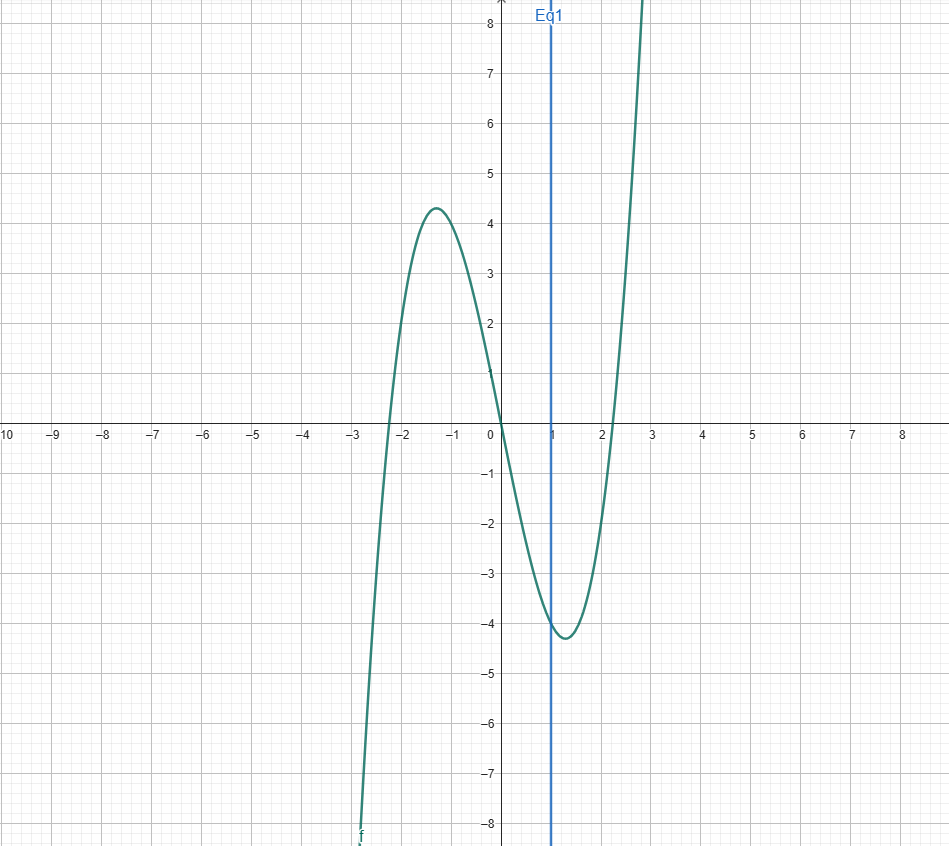

*Wykres 1. Wykres funkcji $f_a(x)$*

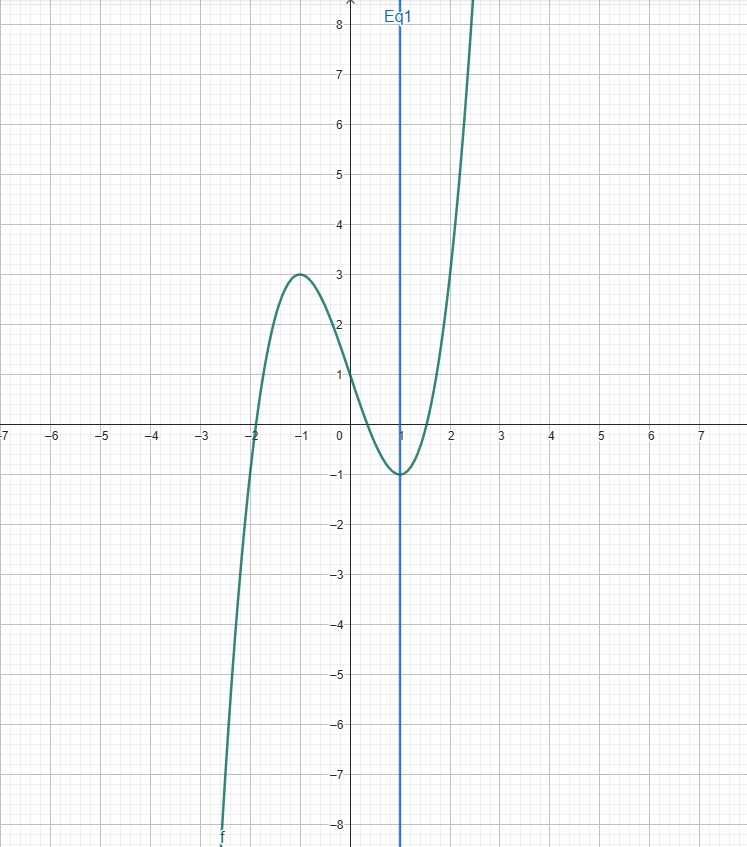

*Wykres 2. Wykres funkcji $f_b(x)$*

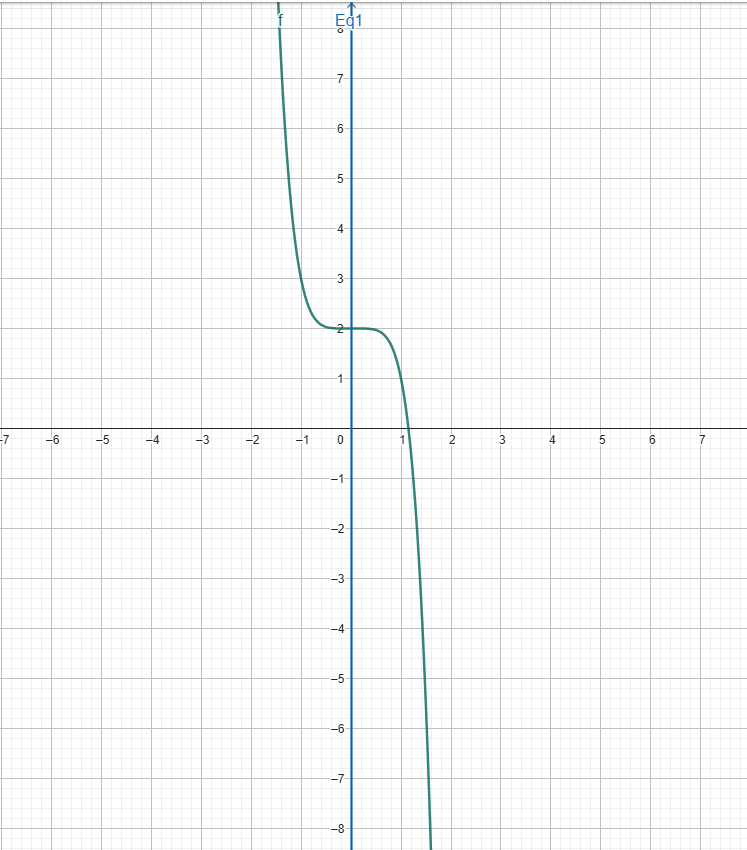

*Wykres 3. Wykres funkcji $f_c(x)$*

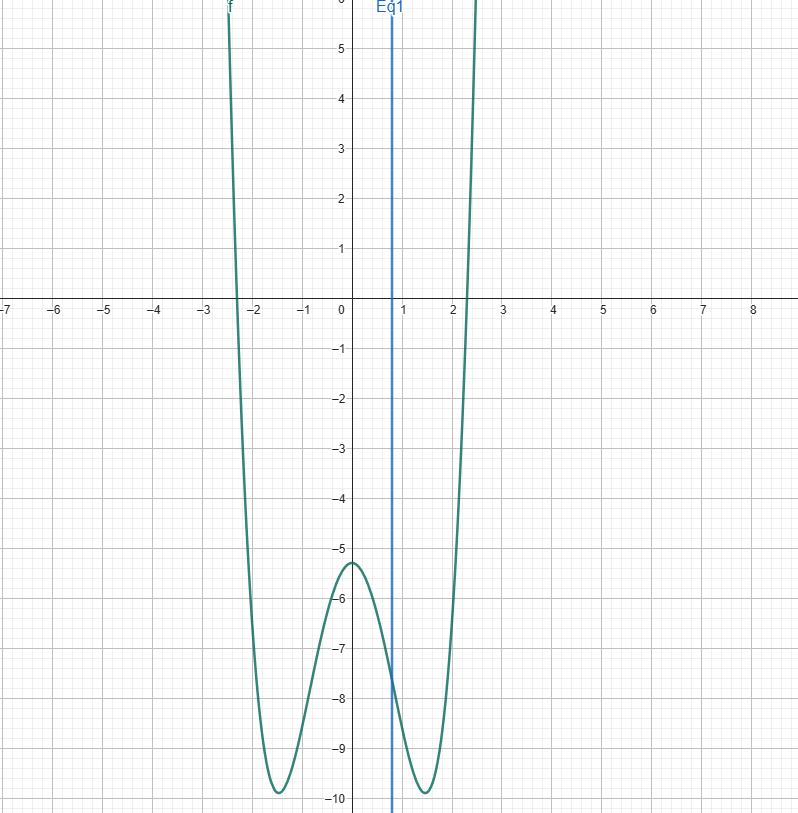

*Wykres 4. Wykres funkcji $f_d(x)$*

Analizując wykresy, zauważamy, że otrzymane metodą biskecji miejsca zerowe są zgodne z miejscami zerowymi funkcji wyznaczonymi w programie `Geogebra`. W związku z tym, możemy stwierdzić, że otrzymane wyniki są poprawne.

Podsumowując, metoda Newtona nie była w stanie znaleźć miejsc zerowych zgodnie z przewidywaniami. Metoda bisekcji bez problemów znalazła miejsca zerowe, które są poprawne.

## Zadanie 2

In [8]:
import numpy as np
from scipy.differentiate import derivative
import pandas as pd
import matplotlib.pyplot as plt

Na początku zdefiniowaliśmy funkcję
$$
f(x) = x^2 - 3x + 2 = 0
$$
oraz funkcje definujące rówanoważny schemat iteracyjny
$$
\phi _1(x) = \frac{x^2 + 2}{3}
$$
$$
\phi _2(x) = \sqrt{3x - 2}
$$
$$
\phi _3(x) = 3 - \frac{2}{x}
$$
$$
\phi _4(x) = \frac{x^2 - 2}{2x - 3}
$$

Następnie przeanalizowaliśmy zbieżność oraz rząd zbieżności schematów iteracyjnych odpowiadających funkcjom $\phi _i(x)$ dla pierwiastka $\alpha = 2$ badając wartości $|\phi` _i(2)|$. Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [9]:
f = lambda x: x**2 - 3*x + 2
alpha = 2

phi1 = lambda x: (x**2 + 2) / 3
phi2 = lambda x: np.sqrt(3*x - 2)
phi3 = lambda x: 3 - (2 / x)
phi4 = lambda x: (x**2 - 2) / (2*x - 3)

dphi1_2 = derivative(phi1, alpha).df
dphi2_2 = derivative(phi2, alpha).df
dphi3_2 = derivative(phi3, alpha).df
dphi4_2 = derivative(phi4, alpha, initial_step=0.3).df

pd.DataFrame([dphi1_2, dphi2_2, dphi3_2, dphi4_2])

,0
0,1.333333
1,0.750000
2,0.500000
3,0.000000


Można zauważyć, że tylko dla funkcji $\phi _1(x)$ mamy $|\phi` _i(2)| > 1$, co oznacza, że funkcja ta nie jest zbieżna w punkcie. Dla wszystkich pozostałych, funkcje te są zbieżne. Następnie, potwierdziliśmy to obliczając wartość miejsca zerowego funkcji $f(x)$ dla każdej z funkcji $\phi _i(x)$. W tym celu wykonaliśmy 10 iteracji w celu jak najlepszego przybliżenia wartości miejsca zerowego. Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [10]:
def test_convergence(x, phi, remaining_iter=10, result=None):
    if result is None:
        result = []
    return test_convergence(phi(x), phi, remaining_iter - 1, result + [x]) if remaining_iter != 0 else result + [x]

x0 = 3

iterationValues = np.array([test_convergence(x0, phi1), test_convergence(x0, phi2), test_convergence(x0, phi3), test_convergence(x0, phi4)])

pd.DataFrame(iterationValues.T, columns=['ϕ1', 'ϕ2', 'ϕ3', "ϕ4"])

,ϕ1,ϕ2,ϕ3,ϕ4
0,3.000000e+00,3.000000,3.000000,3.000000
1,3.666667e+00,2.645751,2.333333,2.333333
2,5.148148e+00,2.436648,2.142857,2.066667
3,9.501143e+00,2.304332,2.066667,2.003922
4,3.075724e+01,2.216528,2.032258,2.000015
5,3.160026e+02,2.156289,2.015873,2.000000
6,3.328655e+04,2.113970,2.007874,2.000000
7,3.693315e+08,2.083725,2.003922,2.000000
8,4.546858e+16,2.061838,2.001957,2.000000
9,6.891304e+32,2.045853,2.000978,2.000000


Jak widać na powyższej tabeli, wartości miejsc zeorwych są zgodne dla wszystkich funkcji $\phi$ poza $\phi _1(x)$, która nie jest zbieżna. Potwierdza to nasze wcześniejsze obliczenia odnośnie zbieżności poszczególnych funkcji $\phi _i(x)$. Następnie wyznaczyliśmy eksperymetalnie rząd zbieżności każdej metody iteracyjnej ze wzoru
$$
r = \frac{\ln \frac{\varepsilon_k}{\varepsilon_{k+1}}}{\ln \frac{\varepsilon_{k-1}}{\varepsilon_k}}
$$
Otrzymane wyniki przedstawiliśmy w tabeli poniżej.

In [11]:
x_star = alpha 
r = []

for i in range(4):
    for k in range(1, iterationValues.shape[1] - 1):
        if i == 3 and k > 4:
            r.append(np.nan)
            continue
        vec = iterationValues[i]
        eps_vec = np.abs(vec - x_star)
        r.append(np.log(eps_vec[k] / eps_vec[k + 1]) / np.log(eps_vec[k - 1] / eps_vec[k]))
        
r = np.array(r).reshape(4, iterationValues.shape[1] - 2)
pd.DataFrame(r.T, columns=['ϕ1', 'ϕ2', 'ϕ3', "ϕ4"])

,ϕ1,ϕ2,ϕ3,ϕ4
0,1.245021,0.894696,0.771244,1.464974
1,1.365183,0.922621,0.899495,1.760374
2,1.547766,0.942910,0.952498,1.958580
3,1.778874,0.957728,0.976872,1.998598
4,1.950815,0.968608,0.988585,NaN
5,1.997311,0.976632,0.994329,NaN
6,1.999987,0.982574,0.997173,NaN
7,2.000000,0.986987,0.998589,NaN
8,2.000000,0.990272,0.999295,NaN


Następnie dla każdej z funkcji $\phi _i(x)$ obliczyliśmy wartość błędu bezwzględnego. Otrzymane wyniki przedstawiliśmy w postaci wykresu z użyciem skali logarytmicznej na osi y.

In [12]:
err = []
for i in range(4):
    for k in range(iterationValues.shape[1]):
        err.append((iterationValues[i][k] - x_star) / x_star)
        
err = np.array(err).reshape(4, iterationValues.shape[1])

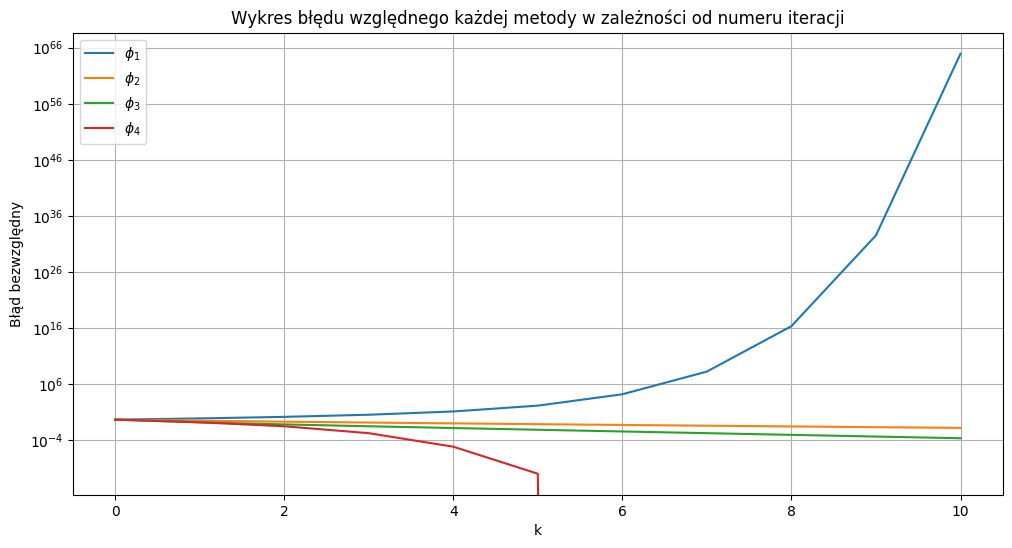

In [13]:
plt.figure(figsize=(12, 6))
plt.title("Wykres błędu względnego każdej metody w zależności od numeru iteracji")

labels = ['$ϕ_1$', '$ϕ_2$', '$ϕ_3$', "$ϕ_4$"]
for i in range(4):
    plt.semilogy(range(iterationValues.shape[1]), err[i], label=labels[i])   
plt.xlabel('k')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

Następnie wykonaliśmy wykres również dla błędu bezwzględnego, ale tylko dla funkcji zbieżnych. Wynik przedstawiliśmy poniżej.

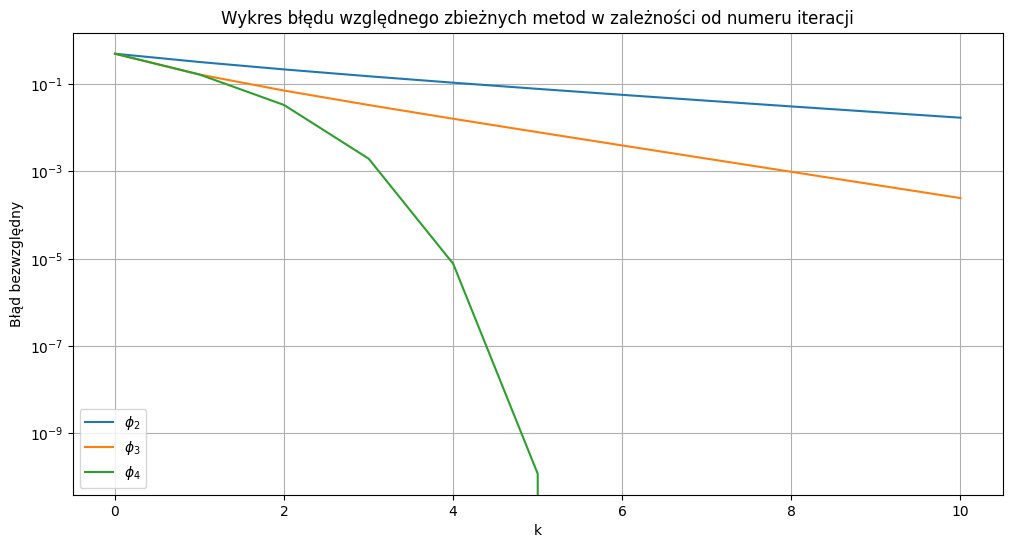

In [14]:
plt.figure(figsize=(12, 6))
plt.title("Wykres błędu względnego zbieżnych metod w zależności od numeru iteracji")

for i in range(1, 4):
    plt.semilogy(range(iterationValues.shape[1]), err[i], label=labels[i])   
plt.xlabel('k')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

Z pierwszego wykresu można zauważyć, że błąd dla funkcji $\phi _1(x)$ jest największy, co jest spowodowane tym, że funkcja ta nie jest zbieżna. Potwierdza to nasze wcześniejsze wnioski odnośnie zbieżności tej funkcji. Z drugiego wykresu można wywnioskować, że funkcja $\phi _4(x)$ daje najlepsze wyniki (posiada najmniejszy błąd), co sprawia, że uwidacznia się fakt, iż funkcja $\phi _4(x)$ ma rząd zbieżności większy niż liniowy. Funkcje $\phi _2(x)$ oraz $\phi _3(x)$ mają podobny rząd zbieżności, jednakże minimalnie lepsze wyniki zwracałą funkcja $\phi _3(x)$. 

### Zadanie 3
W tym zadaniu mieliśmy napisać schematy iteracji wg metody Newtona dla równań nieliniowych: $$ \begin{aligned}
(a) \quad & x^3 - 2x - 5 = 0 \\
(b) \quad & e^{-x} = x \\
(c) \quad & x \sin(x) = 1.
\end{aligned} $$ Następnie trzeba było ustalić ile iteracji należy wykonać, aby osiągnąć 24 i 53-bitową dokładność wyniku, jeśli początkowe przybliżenie pierwiastka $ x_0 $ ma dokładność 4 bitów.

In [15]:
import numpy as np
import pandas as pd

Na początku zdefiniowaliśmy funkcje $f_1(x) = x^3 - 2x - 5$, $f_2(x) = e^{-x} - x$, $f_3(x) = xsin(x) - 1$ oraz ich pochodne. Następnie stworzyliśmy schematy iteracyjne metody Newtona dla każdej z funkcji, zgodnie ze wzorem: $$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$ Za pomocą tych schematów wyznaczyliśmy najpierw pierwiastki z dokładnością 4 bitów. W celu ustalenia dokładności porównywaliśmy różnicę wartości $x$ w kolejnych iteracjach z $\epsilon=2^{-4}$:

In [16]:
fa = lambda x: x**3 - 2*x - 5
dfa = lambda x: 3*x**2 - 2

fb = lambda x: np.exp(-x) - x
dfb = lambda x: -np.exp(-x) - 1

fc = lambda x: x * np.sin(x) - 1
dfc = lambda x: np.sin(x) + x * np.cos(x)

In [17]:
iter_a = lambda x: x - fa(x) / dfa(x)
iter_b = lambda x: x - fb(x) / dfb(x)
iter_c = lambda x: x - fc(x) / dfc(x)

def solve_iter_with_precision(iter_fun, x0, tolerance=1e-7, max_iter=1000):
    x_prev = x0
    x_curr = iter_fun(x_prev)
    iteration = 1
    while abs(x_curr - x_prev) > tolerance and iteration < max_iter:
        x_prev = x_curr
        x_curr = iter_fun(x_prev)
        iteration += 1
    return x_curr, iteration

solutions4bit = [solve_iter_with_precision(iter_a, np.double(2), np.pow(1/2, 4))[0], 
    solve_iter_with_precision(iter_b, np.double(0.5), np.pow(1/2, 4))[0],
    solve_iter_with_precision(iter_c, np.double(1), np.pow(1/2, 4))[0]]
pd.DataFrame(solutions4bit, ["f1", "f2", "f3"], columns=['x0 4bit'])

,x0 4bit
f1,2.094568
f2,0.567143
f3,1.114157


Następnie wyznaczyliśmy przybliżenia z 24-bitową dokładnością:

In [18]:
solutions24bit = pd.DataFrame(
    [solve_iter_with_precision(iter_a, solutions4bit[0], np.pow(1/2, 24)), 
    solve_iter_with_precision(iter_b, solutions4bit[1], np.pow(1/2, 24)),
    solve_iter_with_precision(iter_c, solutions4bit[2], np.pow(1/2, 24))],
    ["f1", "f2", "f3"], columns=['x0 24bit', 'Liczba iteracji']
)

solutions24bit

,x0 24bit,Liczba iteracji
f1,2.094551,2
f2,0.567143,2
f3,1.114157,1


Jak widać w zamieszczonej powyżej tabelce, schematy iteracyjne Newtona bardzo szybko otrzymują wynik z wymaganą dokładnością, co pokazuje skuteczność tej metody.

Potem wyznaczyliśmy przybliżenia z 53-bitową dokładnością: 

In [19]:
solutions53bit = pd.DataFrame(
    [solve_iter_with_precision(iter_a, solutions4bit[0], np.pow(1/2, 53)), 
    solve_iter_with_precision(iter_b, solutions4bit[1], np.pow(1/2, 53)),
    solve_iter_with_precision(iter_c, solutions4bit[2], np.pow(1/2, 53))],
    ["f1", "f2", "f3"], columns=['x0 53bit', 'Liczba iteracji']
)

solutions53bit

,x0 53bit,Liczba iteracji
f1,2.094551,3
f2,0.567143,3
f3,1.114157,1000


W tym przypadku liczba iteracji jest wciąż bardzo niska dla funkcji $f_1$ i $f_2$, ale w przypadku $f_3$ nie udało się uzyskać wymaganej dokładności. Funkcja ta prawdopodobnie nie spełnia warunków zbieżności dla metody Newtona.

### Zadanie 4
W tym zadaniu mieliśmy napisać schemat iteracji wg metody Newtona dla układu równań nieliniowych: $$ \begin{aligned}
x_1^2 + x_2^2 &= 1 \\
x_1^2 - x_2 &= 0.
\end{aligned}$$ Korzystając z podanych wzorów na rozwiązania tego układu równań: $$ \begin{aligned}
x_1 &= \pm \sqrt{\frac{\sqrt{5}}{2} - \frac{1}{2}} \\
x_2 &= \frac{\sqrt{5}}{2} - \frac{1}{2}
\end{aligned} $$ oraz obliczyć błąd względny rozwiązania znalezionego metodą Newtona.

In [20]:
from scipy.differentiate import jacobian
import numpy as np

Najpierw zdefiniowaliśmy funkcje $f_1(x_1, x_2) = x_1^2 + x_2^2 - 1$, $f_2(x_1, x_2)=x_1^2 - x_2$ oraz obliczyliśmy wartości rozwiązań podanych w treści zadania. Nastepnie skorzystaliśmy z Wikipedii, aby znaleźć wzór na wielowymiarowy schemat iteracyjny Newtona: $$ J_{{F}}({x}_n)({x}_{n+1} - {x}_n) = -{F}({x}_n) $$ gdzie ${x}_k$ jest wektorem przybliżającym rozwiązanie $(x_1, x_2)$ w k-tej iteracji, ${F}(x_1, x_2) = (f_1(x_1, x_2), f_2(x_1, x_2))$, $J_{{F}}$ to jakobian funkcji ${F}$. Do wyznaczenia jakobianu wykorzystaliśmy funkcję `scipy.differentiate.jacobian`. Otrzymaliśmy następujące wyniki:

In [21]:
def f1(x):
    return x[0]**2 + x[1]**2 - 1
def f2(x):
    return x[0]**2 - x[1]

def F(x):
    return np.array([f1(x), f2(x)])

def solve_iter_2d(x, max_iterations=100):
    for i in range(max_iterations):
        fx = F(x)
        jx = jacobian(F, x).df
        delta_x = np.linalg.solve(jx, -fx)
        x = x + delta_x
    return x

real_x1 = np.sqrt((np.sqrt(5) - 1) / 2)
real_x2 = (np.sqrt(5) - 1) / 2
real_solution = np.array([real_x1, real_x2])

x0 = np.array([1.0, 1.0], dtype=np.double)

solution = solve_iter_2d(x0)

print(f"Dokładne rozwiązanie: x1 = {real_solution[0]:.8f}, x2 = {real_solution[1]:.8f}")
print(f"Rozwiązanie znalezione metodą Newtona: x1 = {solution[0]:.8f}, x2 = {solution[1]:.8f}")

err = np.abs((solution - real_solution) / real_solution)

print(f"Błąd względny dla x1: {err[0]:.8e}")
print(f"Błąd względny dla x2: {err[1]:.8e}")

Dokładne rozwiązanie: x1 = 0.78615138, x2 = 0.61803399
Rozwiązanie znalezione metodą Newtona: x1 = 0.78615138, x2 = 0.61803399
Błąd względny dla x1: 0.00000000e+00
Błąd względny dla x2: 1.79637859e-16


Rozwiązanie znalezione metodą Newtona dało dokładny wynik dla $x1$ i bardzo zbliżony wynik dla $x2$. Metoda Newtona jest więc skuteczna w przypadku problemów wielowymiarowych.

## Bibliografia

 - Materiały zamieszczone na platformie Microsoft Teams w zespole $\textit{MOwNiT 2025}$ w zakładce $\textit{Materiały z zajęć/lab08/lab8-intro.pdf}$
 - Metoda Newtona w Wikipedii: https://pl.wikipedia.org/wiki/Metoda_Newtona
 - Program Geogebra: https://www.geogebra.org/